In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import process_data

In [6]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [7]:
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated")

In [8]:
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated")
training_data = process_data.load_training_data(interpolated_dir)

Loading data for 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2019
Loading data for 2021
Loading data for 2020
Loading data for 2018


In [9]:
features = ["home_win", "relative_strength", "homeScore", "awayScore", "scoringPlay", "start.down", "start.distance", "start.yardLine", "end.down", "end.distance", "end.yardLine"]
for timestep in training_data.keys():
    # Find rows that have NaN values for my array of features
    rows = training_data[timestep]
    # Get all rows such that one of the features is NaN
    rows_with_nan = [row for row in rows if any(np.isnan(row[feature]) for feature in features)]
    # Print row with NaN values + timestep
    if len(rows_with_nan) > 0:
        print("Timestep:", timestep)
        for row in rows_with_nan:
            print(row)

In [10]:
features_data = process_data.feature_selection(training_data, features)

In [45]:
# Boosted decision tree for classification
from sklearn.ensemble import RandomForestClassifier

models = process_data.setup_models(features_data, RandomForestClassifier, n_estimators=100, max_depth=15, random_state=0)

Training for timestep 0.0
Training for timestep 0.005
Training for timestep 0.01
Training for timestep 0.015
Training for timestep 0.02
Training for timestep 0.025
Training for timestep 0.03
Training for timestep 0.035
Training for timestep 0.04
Training for timestep 0.045
Training for timestep 0.05
Training for timestep 0.055
Training for timestep 0.06
Training for timestep 0.065
Training for timestep 0.07
Training for timestep 0.075
Training for timestep 0.08
Training for timestep 0.085
Training for timestep 0.09
Training for timestep 0.095
Training for timestep 0.1
Training for timestep 0.105
Training for timestep 0.11
Training for timestep 0.115
Training for timestep 0.12
Training for timestep 0.125
Training for timestep 0.13
Training for timestep 0.135
Training for timestep 0.14
Training for timestep 0.145
Training for timestep 0.15
Training for timestep 0.155
Training for timestep 0.16
Training for timestep 0.165
Training for timestep 0.17
Training for timestep 0.175
Training for

In [30]:
test_folders = process_data.load_test_data(interpolated_dir)

Loading data for 2022
Loading data for 2024
Loading data for 2023
Loading data for .DS_Store
Loading data for 2019
Loading data for 2021
Loading data for 2020
Loading data for 2018


In [36]:
features_test_data = {key: process_data.test_feature_selection(test_data, features) for key, test_data in zip(test_folders.keys(), test_folders.values())}

In [46]:
X_tests = [features_test_data[year] for year in features_test_data]
merged = {}
for d in X_tests:
    merged.update(d)
X_tests = merged
new_X_tests = {}
print(len(X_tests))
for file in X_tests:
   timestep = 0
   for i in range(len(X_tests[file])):
        if timestep not in new_X_tests:
           new_X_tests[timestep] = [X_tests[file][i]]
        else:
            new_X_tests[timestep] += [X_tests[file][i]]
        timestep += 0.005
X_tests = new_X_tests
# len(X_tests[0.1])
X_tests.keys()

544


dict_keys([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.030000000000000002, 0.035, 0.04, 0.045, 0.049999999999999996, 0.05499999999999999, 0.05999999999999999, 0.06499999999999999, 0.06999999999999999, 0.075, 0.08, 0.085, 0.09000000000000001, 0.09500000000000001, 0.10000000000000002, 0.10500000000000002, 0.11000000000000003, 0.11500000000000003, 0.12000000000000004, 0.12500000000000003, 0.13000000000000003, 0.13500000000000004, 0.14000000000000004, 0.14500000000000005, 0.15000000000000005, 0.15500000000000005, 0.16000000000000006, 0.16500000000000006, 0.17000000000000007, 0.17500000000000007, 0.18000000000000008, 0.18500000000000008, 0.19000000000000009, 0.1950000000000001, 0.2000000000000001, 0.2050000000000001, 0.2100000000000001, 0.2150000000000001, 0.2200000000000001, 0.22500000000000012, 0.23000000000000012, 0.23500000000000013, 0.24000000000000013, 0.24500000000000013, 0.2500000000000001, 0.2550000000000001, 0.2600000000000001, 0.2650000000000001, 0.27000000000000013, 0.2750000000000001

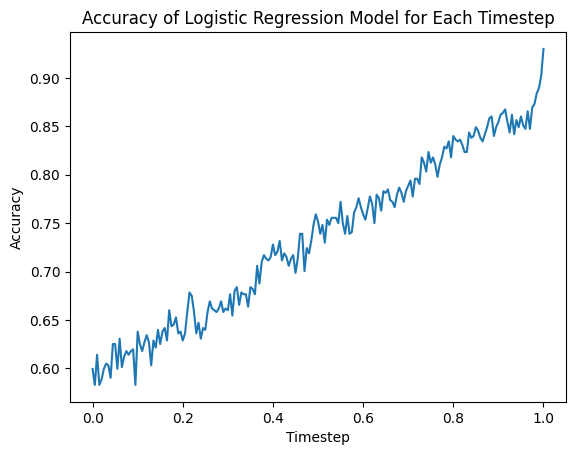

In [47]:
process_data.plot(models, X_tests)

In [48]:
process_data.write_predictions(models, features_test_data, interpolated_dir, "random_forest_phat_b")

2024
Finished writing to updated_game_401671749.csv
Finished writing to updated_game_401671761.csv
Finished writing to updated_game_401671775.csv
Finished writing to updated_game_401671832.csv
Finished writing to updated_game_401671826.csv
Finished writing to updated_game_401671629.csv
Finished writing to updated_game_401671601.csv
Finished writing to updated_game_401671600.csv
Finished writing to updated_game_401671628.csv
Finished writing to updated_game_401671827.csv
Finished writing to updated_game_401671833.csv
Finished writing to updated_game_401671774.csv
Finished writing to updated_game_401671760.csv
Finished writing to updated_game_401671748.csv
Finished writing to updated_game_401671789.csv
Finished writing to updated_game_401671776.csv
Finished writing to updated_game_401671762.csv
Finished writing to updated_game_401671825.csv
Finished writing to updated_game_401671831.csv
Finished writing to updated_game_401671819.csv
Finished writing to updated_game_401671616.csv
Finished